In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.measure import shannon_entropy

def laplacian_contrast(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

def rms_contrast(image):
    mean_intensity = np.mean(image)
    return np.sqrt(np.mean((image - mean_intensity) ** 2))

def gradient_sharpness(image):
    gx, gy = np.gradient(image)
    return np.mean(np.sqrt(gx**2 + gy**2))

In [2]:
def analysis_summary(dataset):

    # Class Distribution
    print("Dataset Summary:")
    print(f"Number of samples: {len(dataset)}")
    print(f"Image size: {dataset.size}")

    label_dict = dataset.info['label']
    print(f"Labels: {label_dict}")
    label_df = pd.DataFrame(dataset.labels, columns=['label'])
    label_df['label'] = label_df['label'].astype(str).map(label_dict)
    labels_count = label_df['label'].value_counts().reset_index()
    labels_count.columns = ['label', 'count']


    # Plotting the class distribution
    plt.figure(figsize=(8, 6))
    labels_count.plot(x='label', y='count', kind='bar', title='Class Distribution')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

    # Image Analysis
    
    rms = []
    lap = []
    sharp = []
    entropy_values = []
    for i in range(len(dataset)):
        print(f'Processing image {i+1}/{len(dataset)} for analysis', end='\r')
        image = dataset[i][0]
        # Convert PIL Image to numpy array
        if not isinstance(image, np.ndarray):
            image_np = np.array(image)
        else:
            image_np = image
        laplacian_value = laplacian_contrast(image_np)
        rms_value = rms_contrast(image_np)
        sharpness_value = gradient_sharpness(image_np)
        entropy_value = shannon_entropy(image_np)
        lap.append(laplacian_value)
        rms.append(rms_value)
        sharp.append(sharpness_value)
        entropy_values.append(entropy_value)

    analysis_df = pd.DataFrame({
        'laplacian_contrast': lap,
        'rms_contrast': rms,
        'gradient_sharpness': sharp,
        'shannon_entropy': entropy_values
    })

    lap_mean = analysis_df['laplacian_contrast'].mean()
    rms_mean = analysis_df['rms_contrast'].mean()
    sharpness_mean = analysis_df['gradient_sharpness'].mean()
    entropy_mean = analysis_df['shannon_entropy'].mean()

    print(f'Laplacian Contrast Mean: {lap_mean}')
    print(f'RMS Contrast Mean: {rms_mean}')
    print(f'Gradient Sharpness Mean: {sharpness_mean}')
    print(f'Shannon Entropy Mean: {entropy_mean}')

    # Plotting the contrast values
    plt.figure(figsize=(12, 12))
    plt.subplot(2, 2, 1)
    plt.hist(analysis_df['laplacian_contrast'], bins=50, color='blue', alpha=0.7)
    plt.axvline(lap_mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.legend()
    plt.title('Laplacian Contrast Distribution')
    plt.xlabel('Laplacian Contrast')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 2, 2)
    plt.hist(analysis_df['rms_contrast'], bins=50, color='green', alpha=0.7)
    plt.axvline(rms_mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.legend()
    plt.title('RMS Contrast Distribution')
    plt.xlabel('RMS Contrast')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 3)
    plt.hist(analysis_df['gradient_sharpness'], bins=50, color='purple', alpha=0.7)
    plt.axvline(sharpness_mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.legend()
    plt.title('Gradient Sharpness Distribution')
    plt.xlabel('Gradient Sharpness')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 4)
    plt.hist(analysis_df['shannon_entropy'], bins=50, color='orange', alpha=0.7)
    plt.axvline(entropy_mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.legend()
    plt.title('Shannon Entropy Distribution')
    plt.xlabel('Shannon Entropy')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [3]:
from medmnist import OCTMNIST

octmnist_train = OCTMNIST(split='train', size=224, download=True)

octmnist_train.montage(rows=5, cols=5, save_path='octmnist_train_montage.png')

In [4]:
octmnist_train

Dataset OCTMNIST of size 224 (octmnist_224)
    Number of datapoints: 97477
    Root location: C:\Users\samue\.medmnist
    Split: train
    Task: multi-class
    Number of channels: 1
    Meaning of labels: {'0': 'choroidal neovascularization', '1': 'diabetic macular edema', '2': 'drusen', '3': 'normal'}
    Number of samples: {'train': 97477, 'val': 10832, 'test': 1000}
    Description: The OCTMNIST is based on a prior dataset of 109,309 valid optical coherence tomography (OCT) images for retinal diseases. The dataset is comprised of 4 diagnosis categories, leading to a multi-class classification task. We split the source training set with a ratio of 9:1 into training and validation set, and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−1,536)×(277−512). We center-crop the images and resize them into 1×28×28.
    License: CC BY 4.0

Dataset Summary:
Number of samples: 97477
Image size: 224
Labels: {'0': 'choroidal neovascularization', '1': 'diabetic macular edema', '2': 'drusen', '3': 'normal'}


<Figure size 800x600 with 0 Axes>

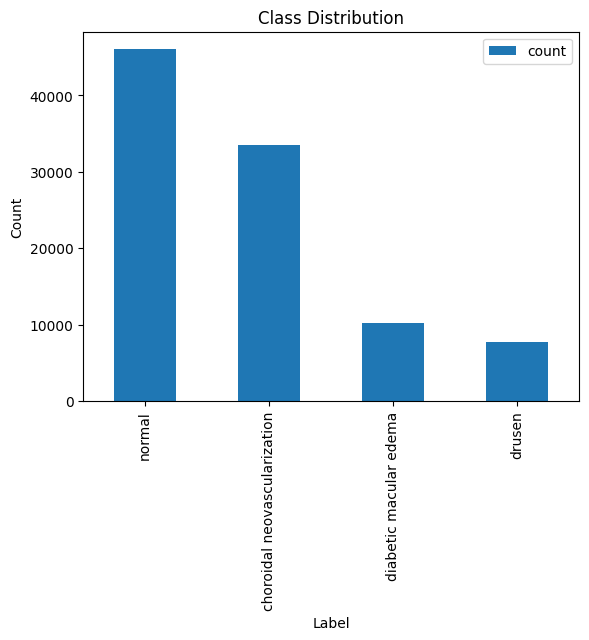

Laplacian Contrast Mean: 592.7931339494507
RMS Contrast Mean: 48.544467265215914
Gradient Sharpness Mean: 7.247709310934837
Shannon Entropy Mean: 6.415679811600468


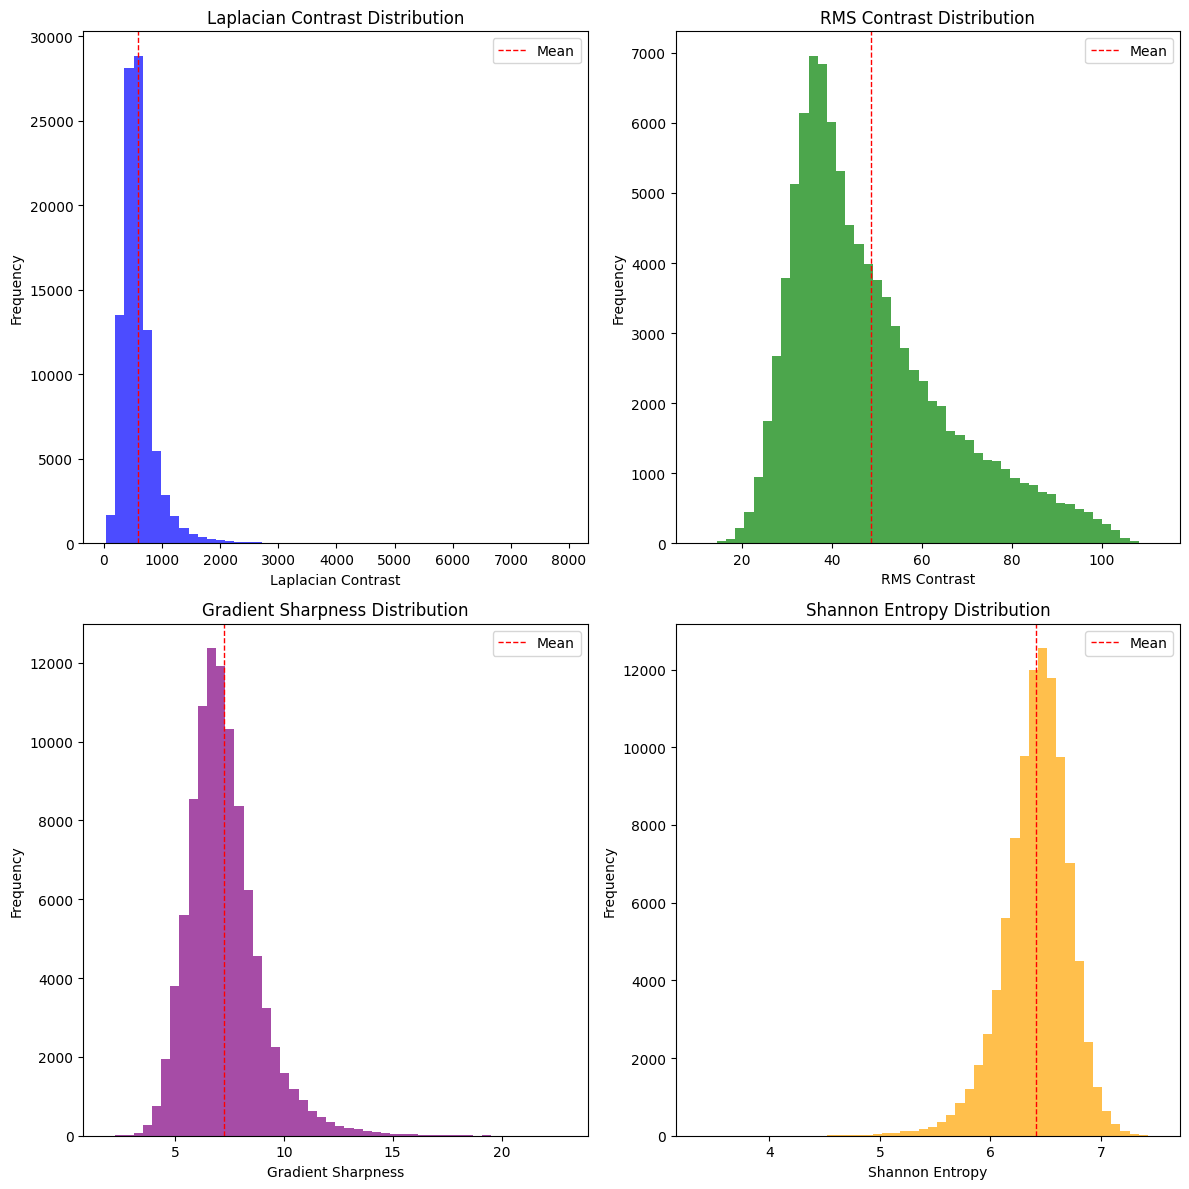

Dataset Summary:
Number of samples: 10832
Image size: 224
Labels: {'0': 'choroidal neovascularization', '1': 'diabetic macular edema', '2': 'drusen', '3': 'normal'}


<Figure size 800x600 with 0 Axes>

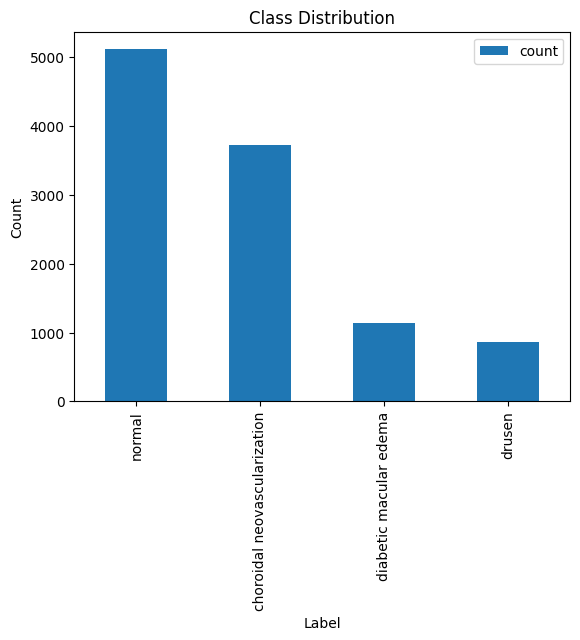

Laplacian Contrast Mean: 590.0903420171207
RMS Contrast Mean: 48.33710346749044
Gradient Sharpness Mean: 7.230367995643526
Shannon Entropy Mean: 6.415010088425019


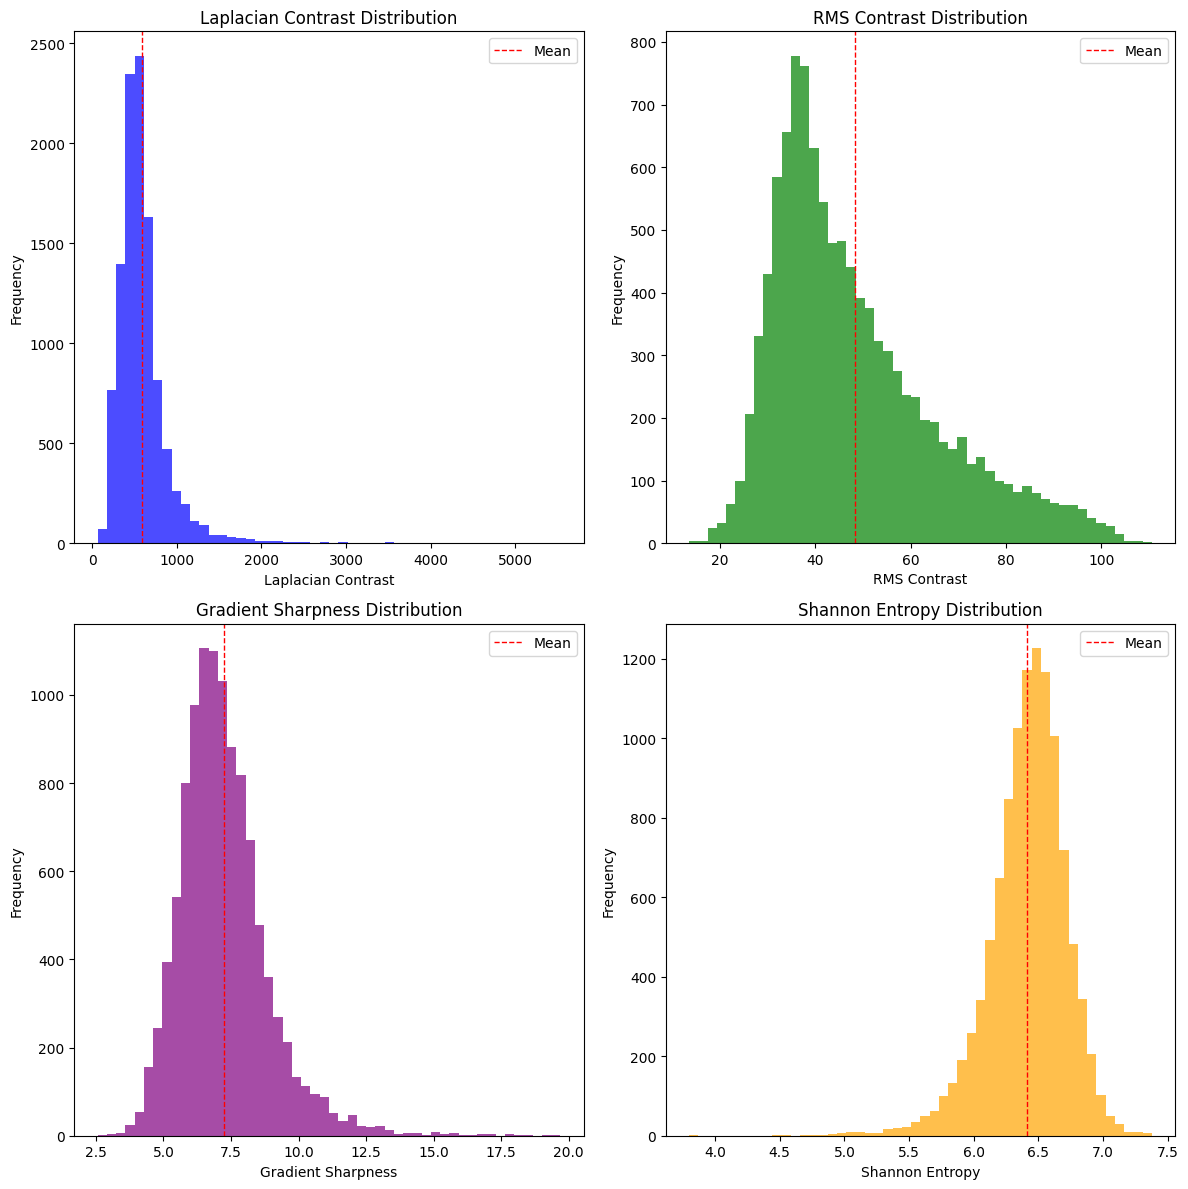

Dataset Summary:
Number of samples: 1000
Image size: 224
Labels: {'0': 'choroidal neovascularization', '1': 'diabetic macular edema', '2': 'drusen', '3': 'normal'}


<Figure size 800x600 with 0 Axes>

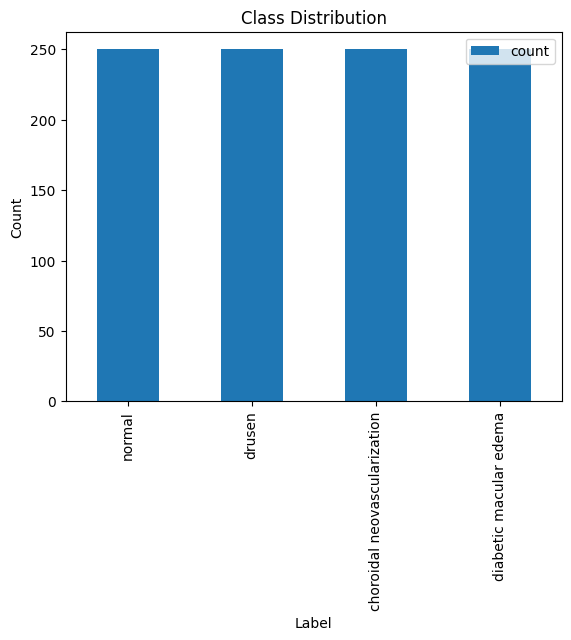

Laplacian Contrast Mean: 766.520668612371
RMS Contrast Mean: 54.41336199158913
Gradient Sharpness Mean: 9.308742336037039
Shannon Entropy Mean: 6.534705184548


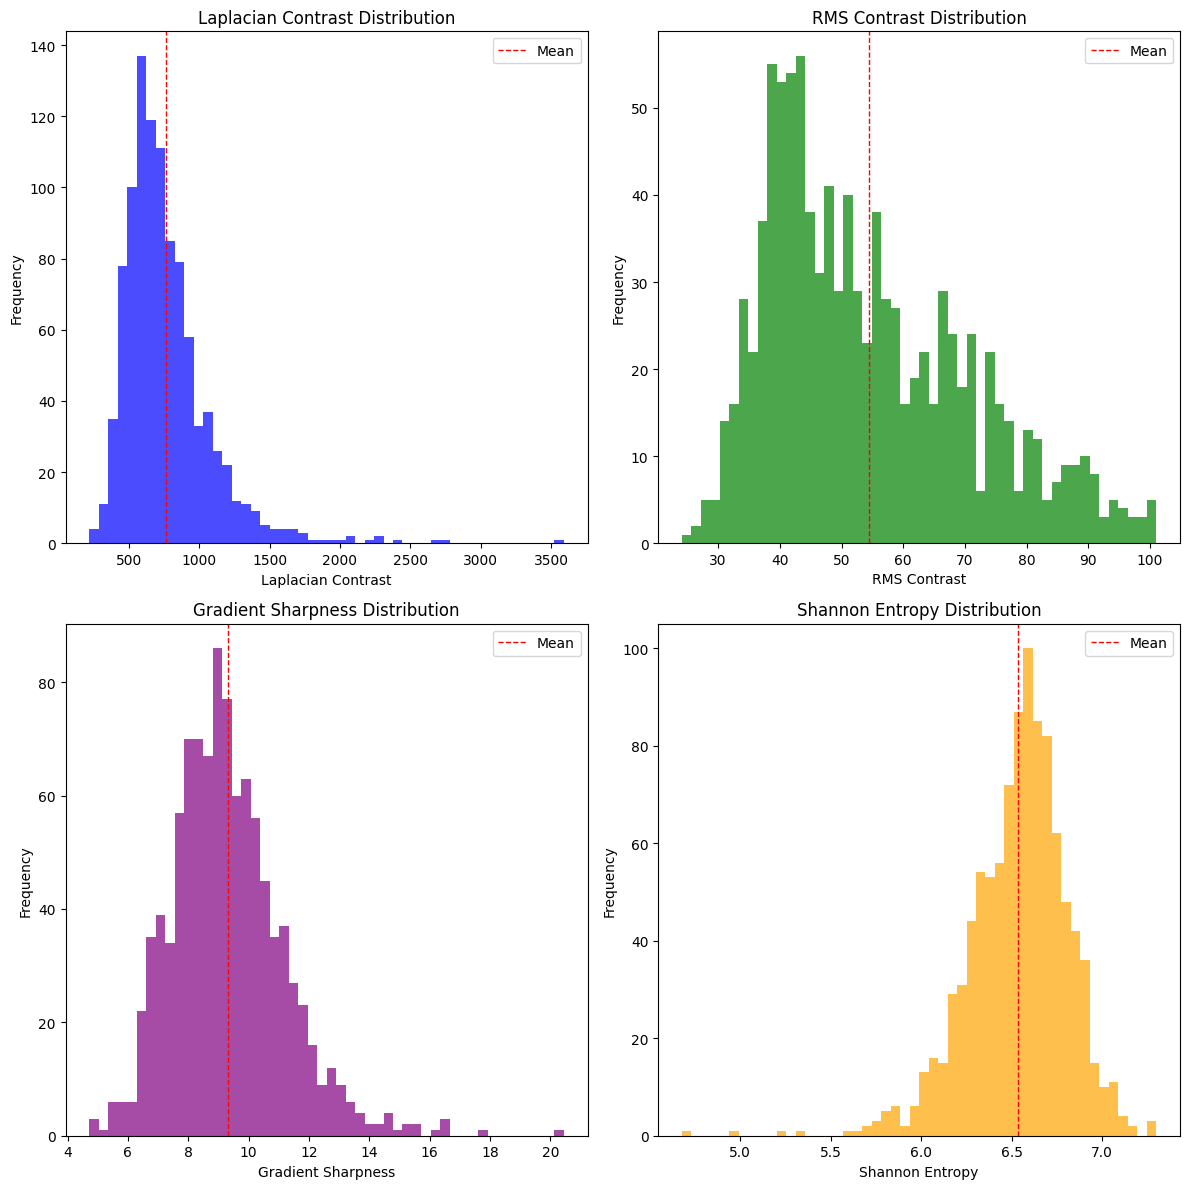

In [3]:
from medmnist import OCTMNIST

octmnist_train = OCTMNIST(split='train', size=224, download=True)
octmnist_val = OCTMNIST(split='val', size=224, download=True)
octmnist_test = OCTMNIST(split='test', size=224, download=True)

analysis_summary(octmnist_train)
analysis_summary(octmnist_val)
analysis_summary(octmnist_test)

Dataset Summary:
Number of samples: 34561
Image size: 224
Labels: {'0': 'bladder', '1': 'femur-left', '2': 'femur-right', '3': 'heart', '4': 'kidney-left', '5': 'kidney-right', '6': 'liver', '7': 'lung-left', '8': 'lung-right', '9': 'pancreas', '10': 'spleen'}


<Figure size 800x600 with 0 Axes>

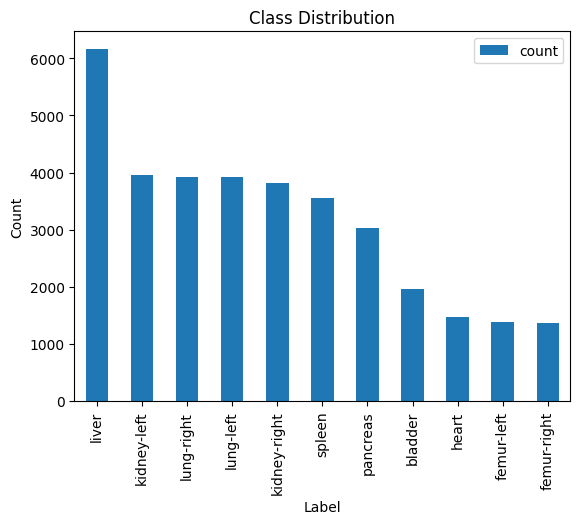

Laplacian Contrast Mean: 98.30212210282835
RMS Contrast Mean: 59.907485889823015
Gradient Sharpness Mean: 6.569052520155769
Shannon Entropy Mean: 6.575351003865568


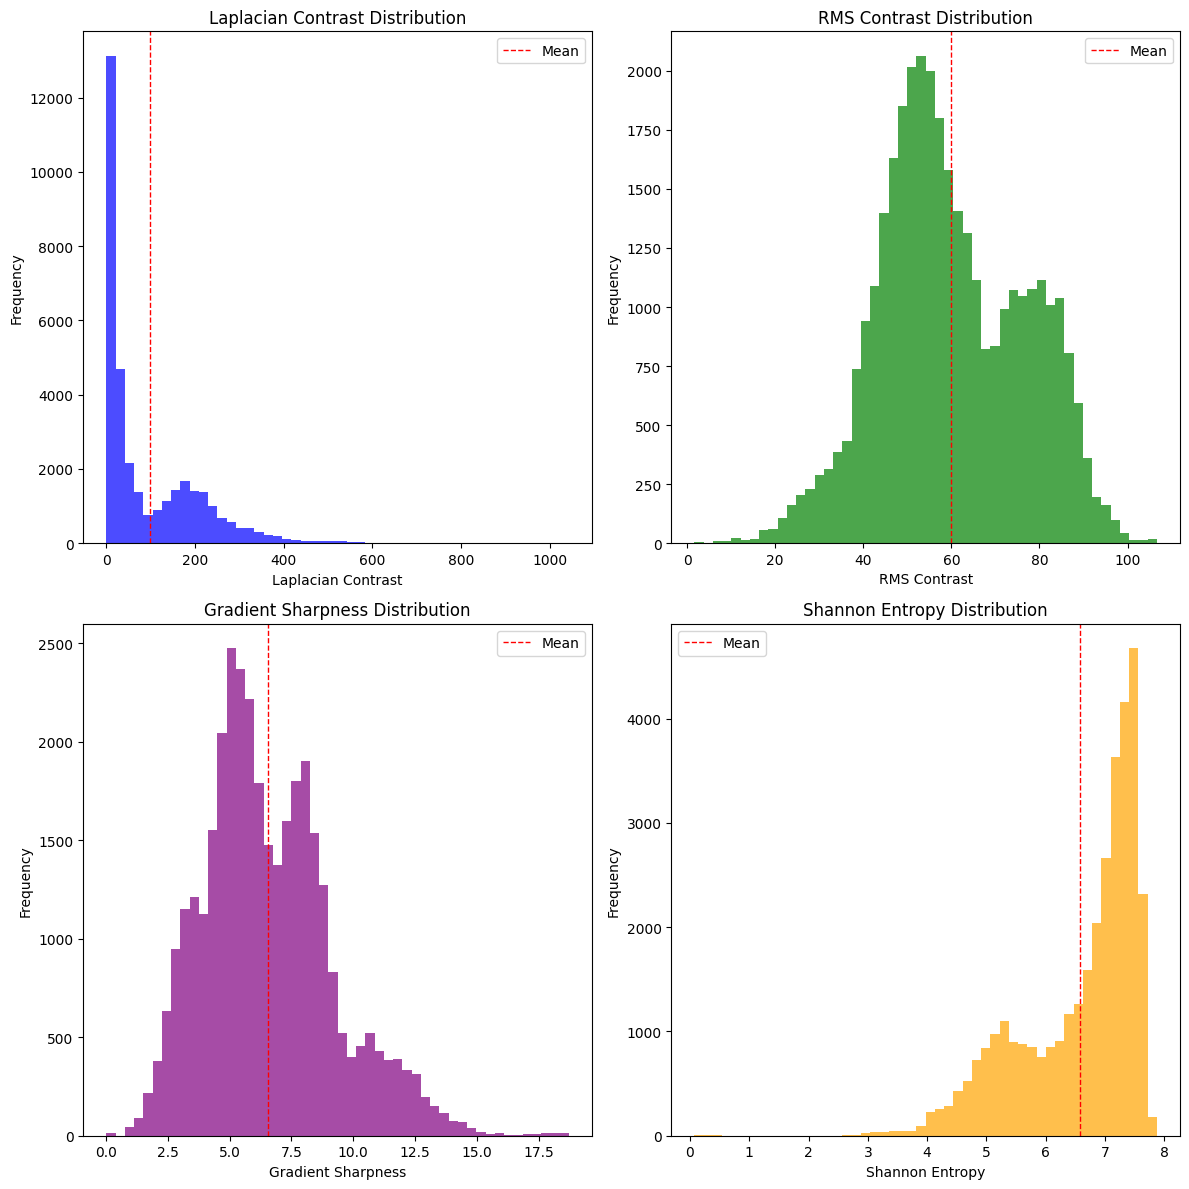

Dataset Summary:
Number of samples: 6491
Image size: 224
Labels: {'0': 'bladder', '1': 'femur-left', '2': 'femur-right', '3': 'heart', '4': 'kidney-left', '5': 'kidney-right', '6': 'liver', '7': 'lung-left', '8': 'lung-right', '9': 'pancreas', '10': 'spleen'}


<Figure size 800x600 with 0 Axes>

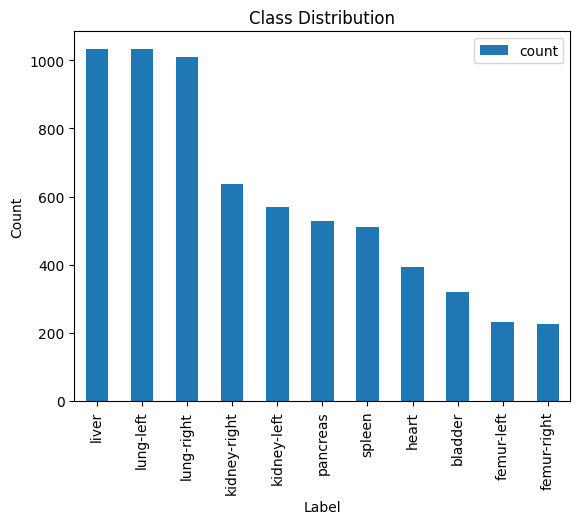

Laplacian Contrast Mean: 123.32873309434072
RMS Contrast Mean: 60.861357175633216
Gradient Sharpness Mean: 6.944222751102405
Shannon Entropy Mean: 6.487955052346421


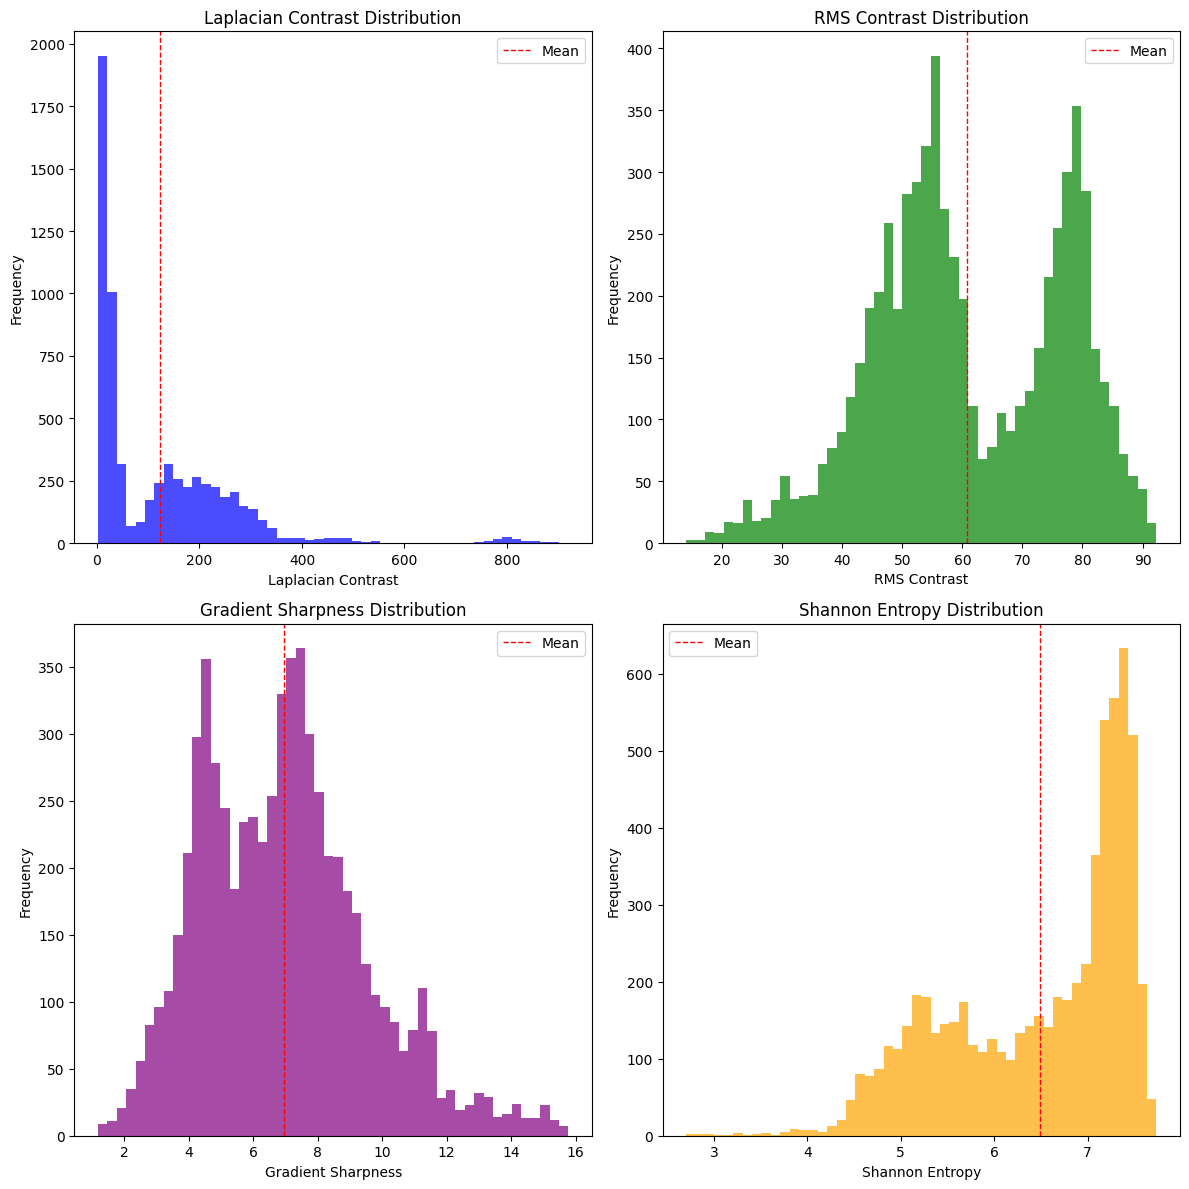

Dataset Summary:
Number of samples: 17778
Image size: 224
Labels: {'0': 'bladder', '1': 'femur-left', '2': 'femur-right', '3': 'heart', '4': 'kidney-left', '5': 'kidney-right', '6': 'liver', '7': 'lung-left', '8': 'lung-right', '9': 'pancreas', '10': 'spleen'}


<Figure size 800x600 with 0 Axes>

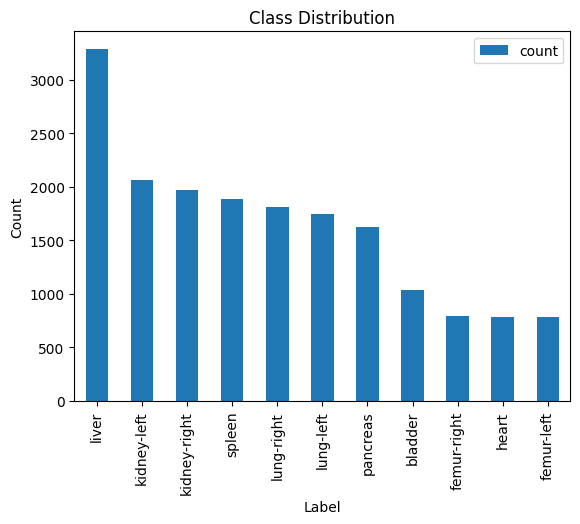

Laplacian Contrast Mean: 99.28468198833586
RMS Contrast Mean: 57.29875349039081
Gradient Sharpness Mean: 6.552752734257387
Shannon Entropy Mean: 6.626385143011254


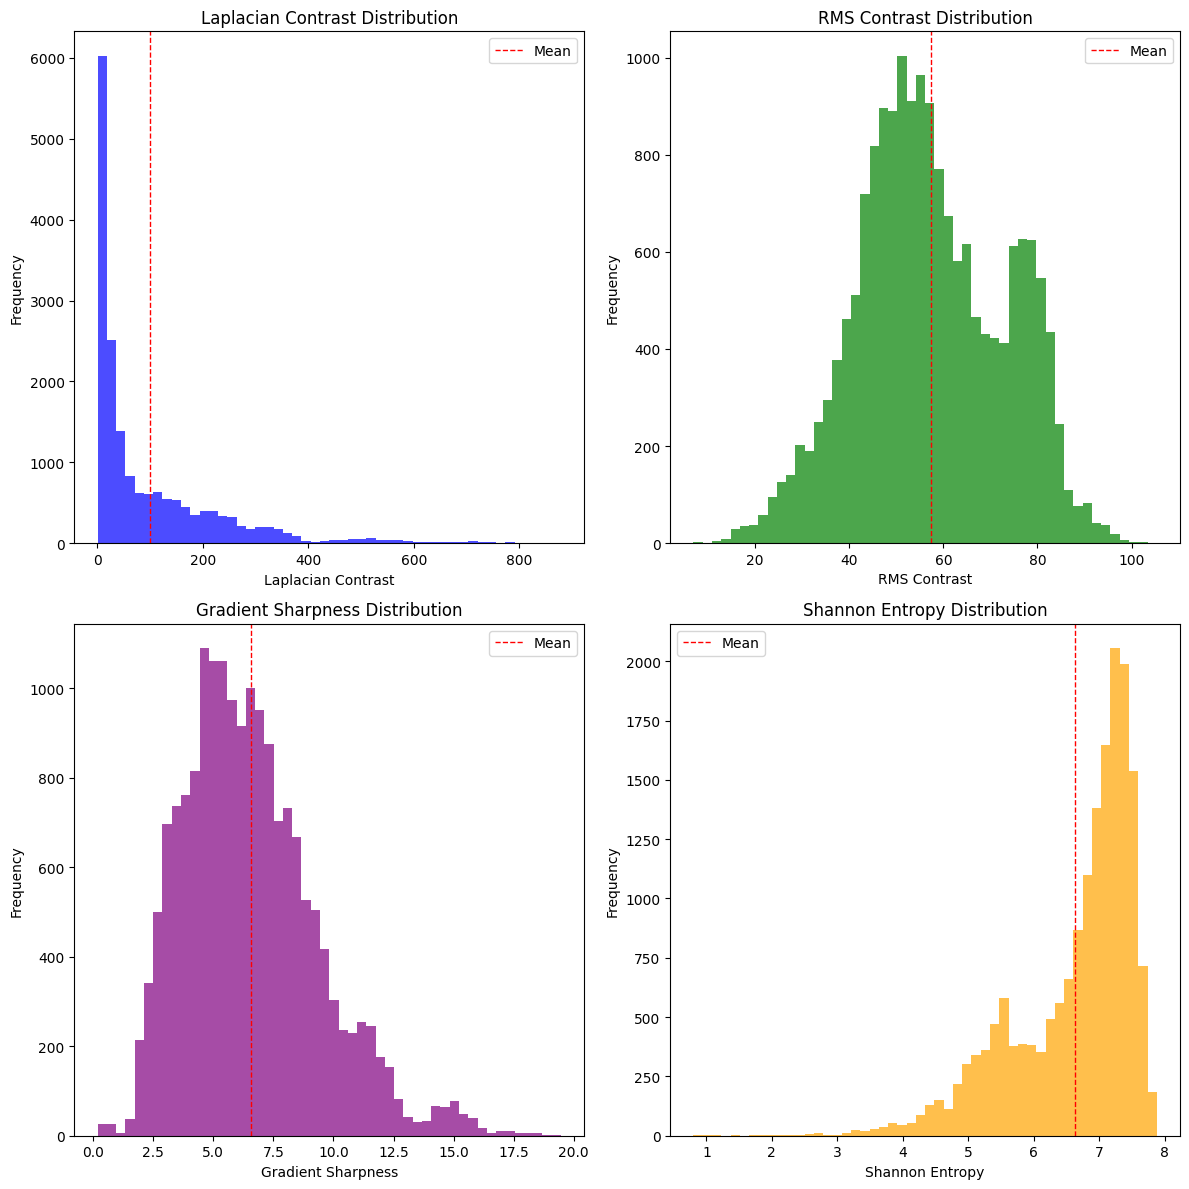

In [4]:
from medmnist import OrganAMNIST, OrganCMNIST, OrganSMNIST

organ_amnist_train = OrganAMNIST(split='train', size=224, download=True)
organ_amnist_val = OrganAMNIST(split='val', size=224, download=True)
organ_amnist_test = OrganAMNIST(split='test', size=224, download=True)

analysis_summary(organ_amnist_train)
analysis_summary(organ_amnist_val)
analysis_summary(organ_amnist_test)

Dataset Summary:
Number of samples: 12975
Image size: 224
Labels: {'0': 'bladder', '1': 'femur-left', '2': 'femur-right', '3': 'heart', '4': 'kidney-left', '5': 'kidney-right', '6': 'liver', '7': 'lung-left', '8': 'lung-right', '9': 'pancreas', '10': 'spleen'}


<Figure size 800x600 with 0 Axes>

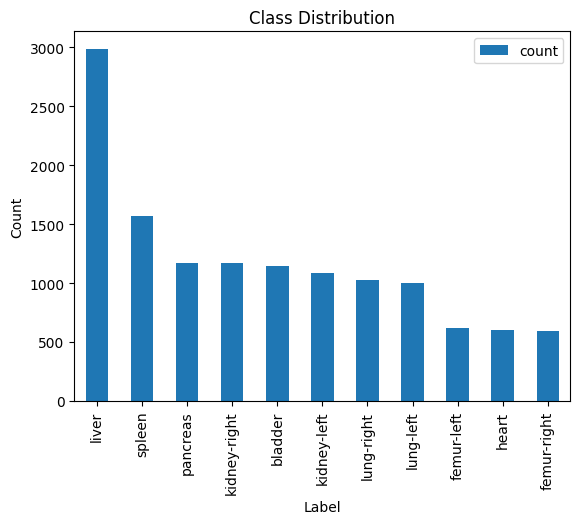

Laplacian Contrast Mean: 148.81099896937994
RMS Contrast Mean: 58.19911116475919
Gradient Sharpness Mean: 7.122256686991615
Shannon Entropy Mean: 6.631926467407728


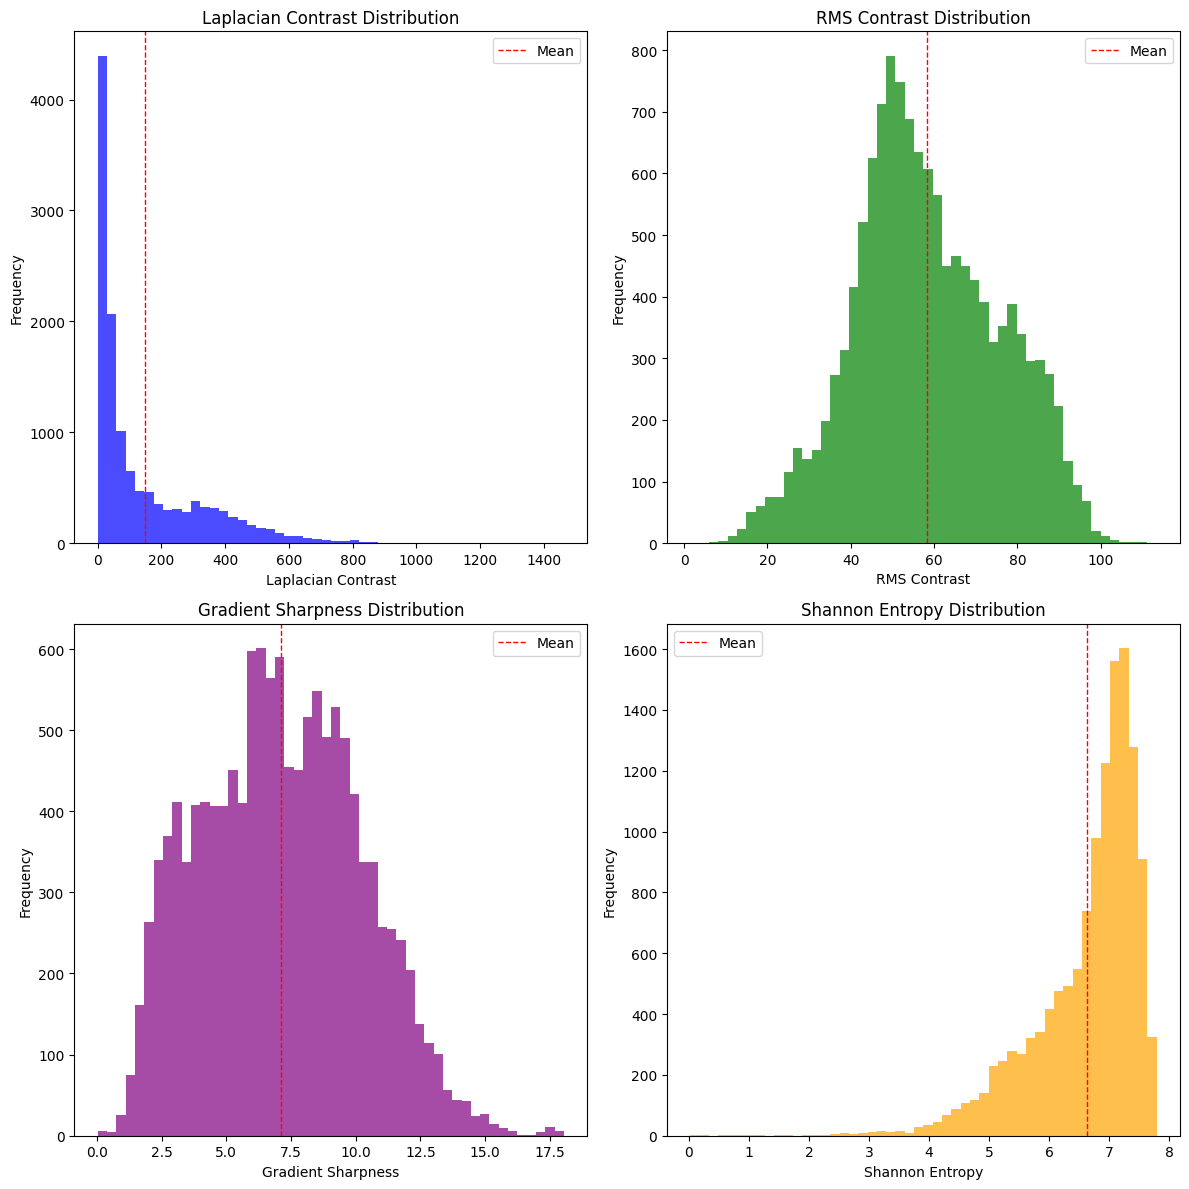

Dataset Summary:
Number of samples: 2392
Image size: 224
Labels: {'0': 'bladder', '1': 'femur-left', '2': 'femur-right', '3': 'heart', '4': 'kidney-left', '5': 'kidney-right', '6': 'liver', '7': 'lung-left', '8': 'lung-right', '9': 'pancreas', '10': 'spleen'}


<Figure size 800x600 with 0 Axes>

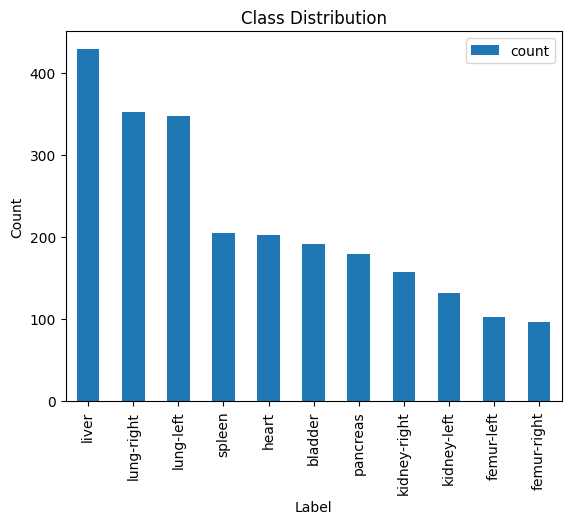

Laplacian Contrast Mean: 205.02977974724092
RMS Contrast Mean: 60.916620196740105
Gradient Sharpness Mean: 7.726660565696371
Shannon Entropy Mean: 6.506814958806321


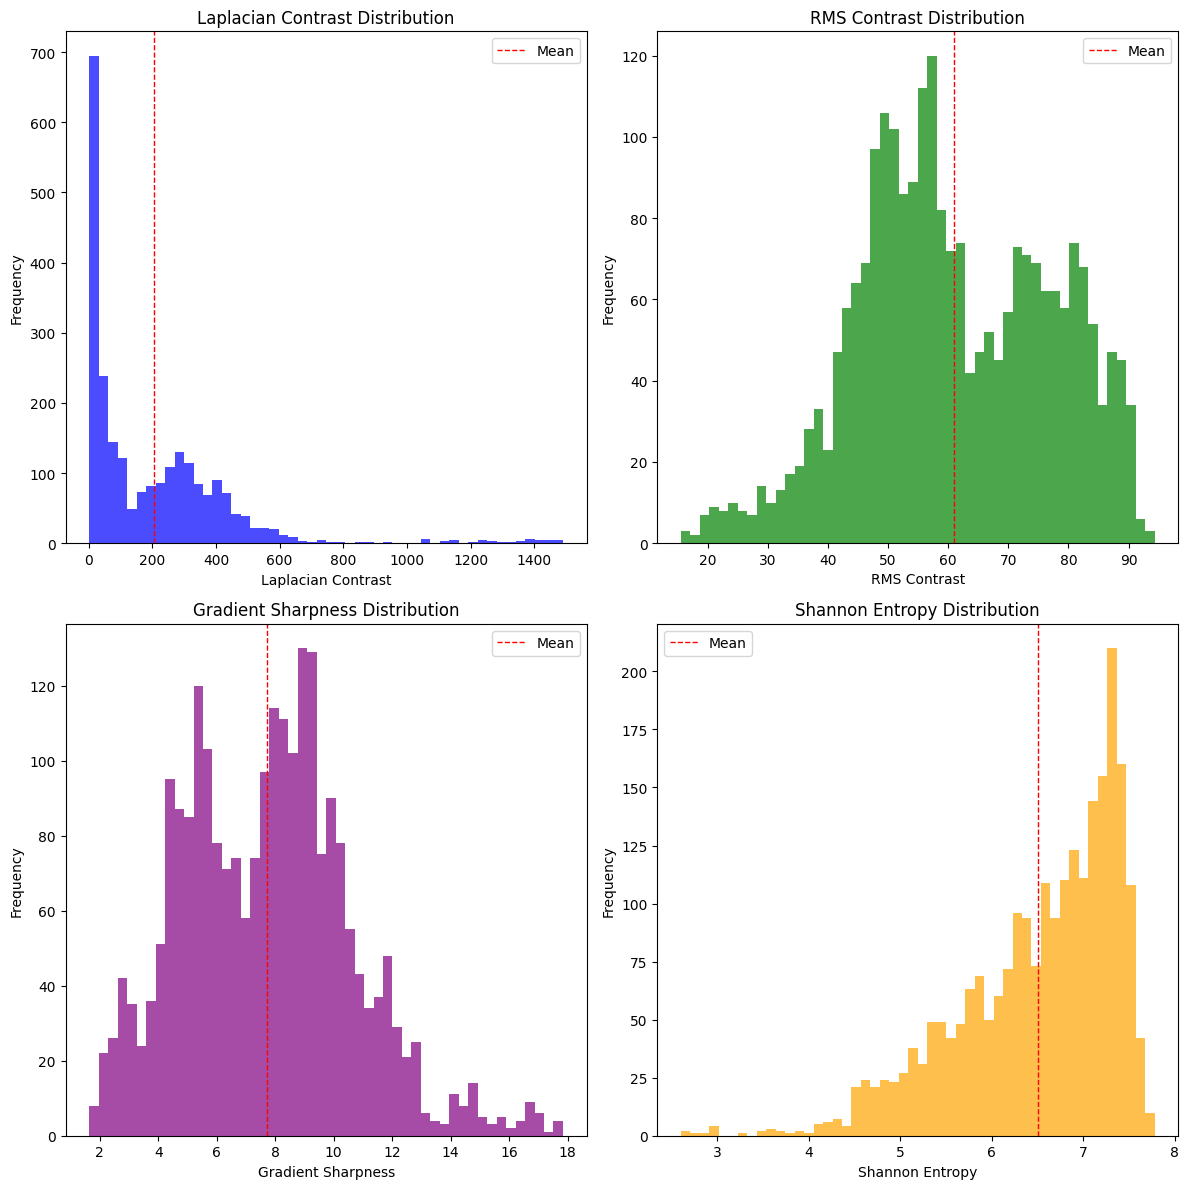

Dataset Summary:
Number of samples: 8216
Image size: 224
Labels: {'0': 'bladder', '1': 'femur-left', '2': 'femur-right', '3': 'heart', '4': 'kidney-left', '5': 'kidney-right', '6': 'liver', '7': 'lung-left', '8': 'lung-right', '9': 'pancreas', '10': 'spleen'}


<Figure size 800x600 with 0 Axes>

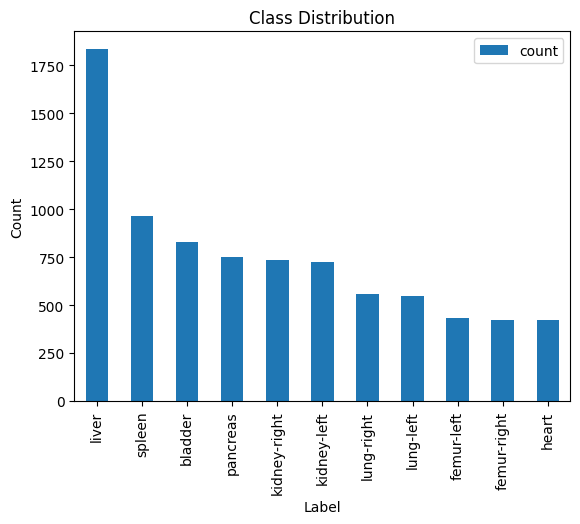

Laplacian Contrast Mean: 130.06064045422235
RMS Contrast Mean: 54.51189592449786
Gradient Sharpness Mean: 6.603934759165533
Shannon Entropy Mean: 6.626231560281235


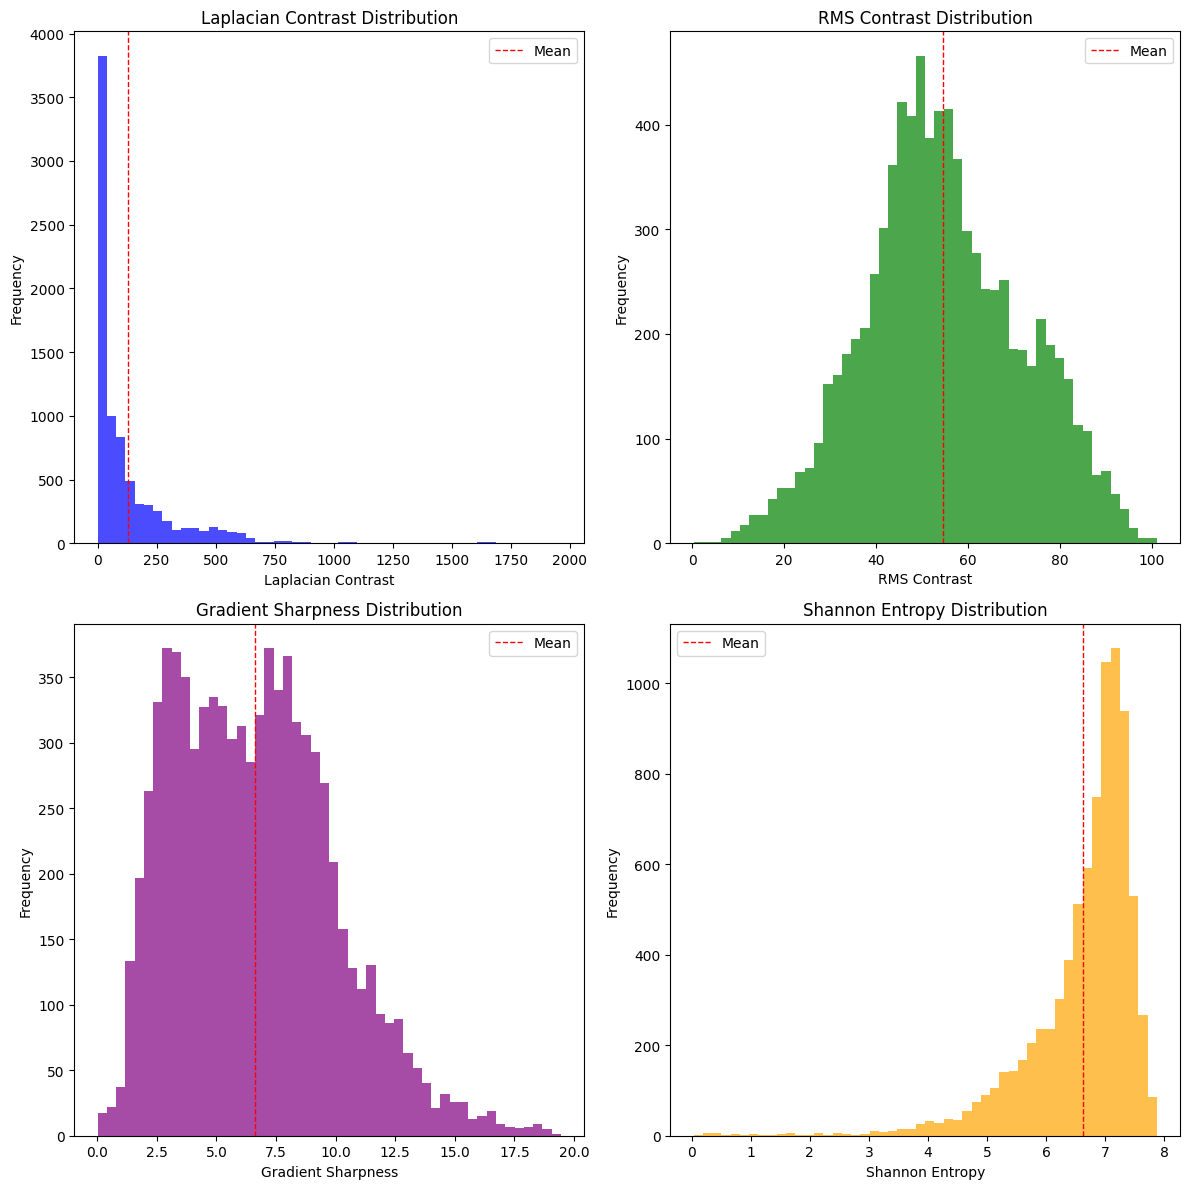

In [5]:
organ_cmnist_train = OrganCMNIST(split='train', size=224, download=True)
organ_cmnist_val = OrganCMNIST(split='val', size=224, download=True)
organ_cmnist_test = OrganCMNIST(split='test', size=224, download=True)

analysis_summary(organ_cmnist_train)
analysis_summary(organ_cmnist_val)
analysis_summary(organ_cmnist_test)

Dataset Summary:
Number of samples: 13932
Image size: 224
Labels: {'0': 'bladder', '1': 'femur-left', '2': 'femur-right', '3': 'heart', '4': 'kidney-left', '5': 'kidney-right', '6': 'liver', '7': 'lung-left', '8': 'lung-right', '9': 'pancreas', '10': 'spleen'}


<Figure size 800x600 with 0 Axes>

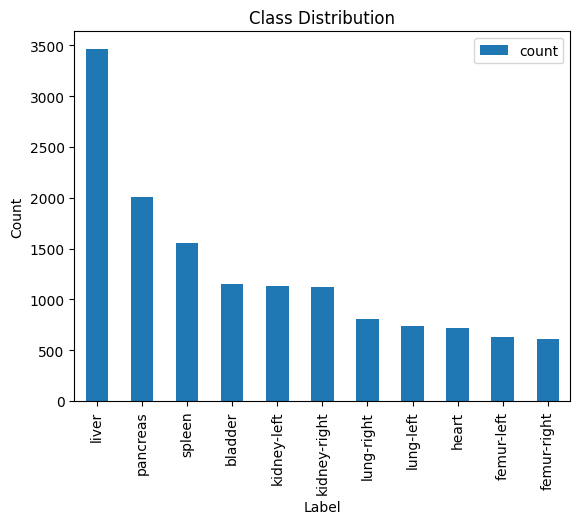

Laplacian Contrast Mean: 128.68056670521258
RMS Contrast Mean: 56.61776862095794
Gradient Sharpness Mean: 6.741539620260509
Shannon Entropy Mean: 6.631946567018209


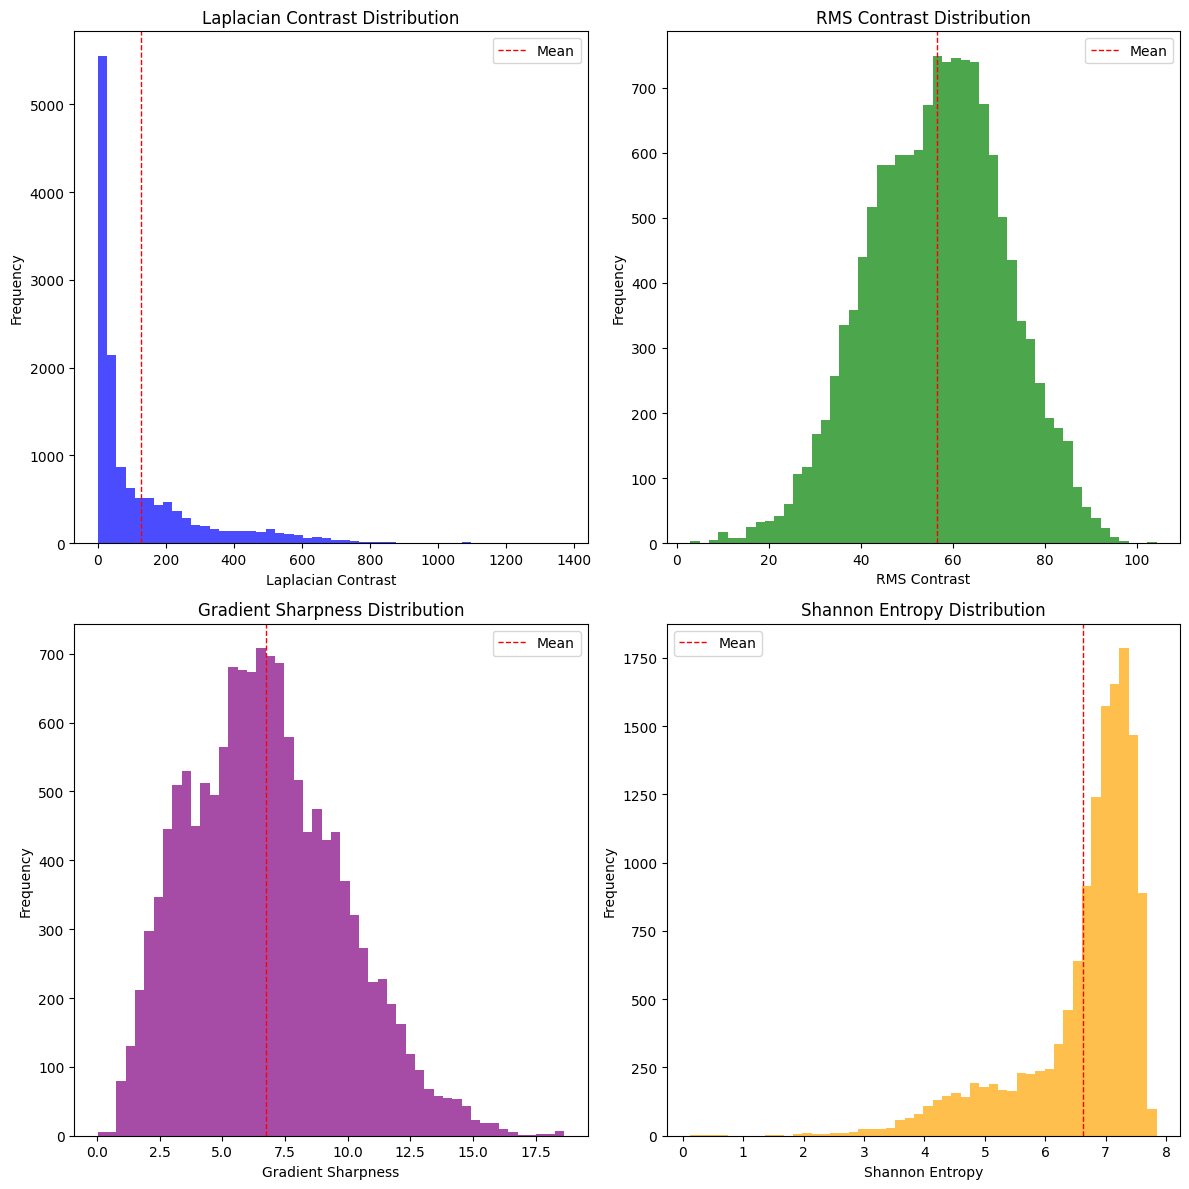

Dataset Summary:
Number of samples: 2452
Image size: 224
Labels: {'0': 'bladder', '1': 'femur-left', '2': 'femur-right', '3': 'heart', '4': 'kidney-left', '5': 'kidney-right', '6': 'liver', '7': 'lung-left', '8': 'lung-right', '9': 'pancreas', '10': 'spleen'}


<Figure size 800x600 with 0 Axes>

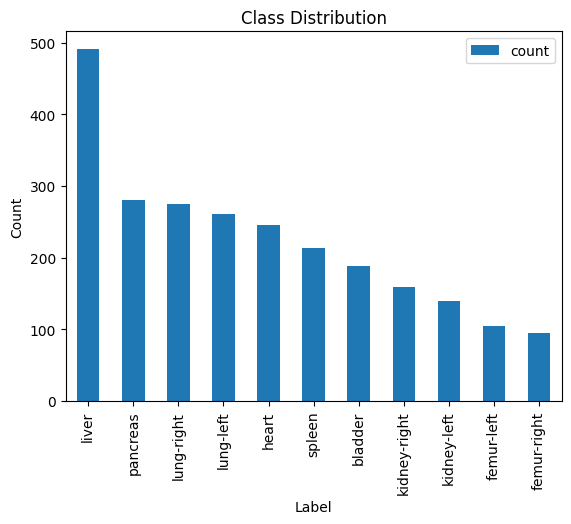

Laplacian Contrast Mean: 192.0950141581741
RMS Contrast Mean: 57.30611663484293
Gradient Sharpness Mean: 7.398295601932109
Shannon Entropy Mean: 6.480694472001682


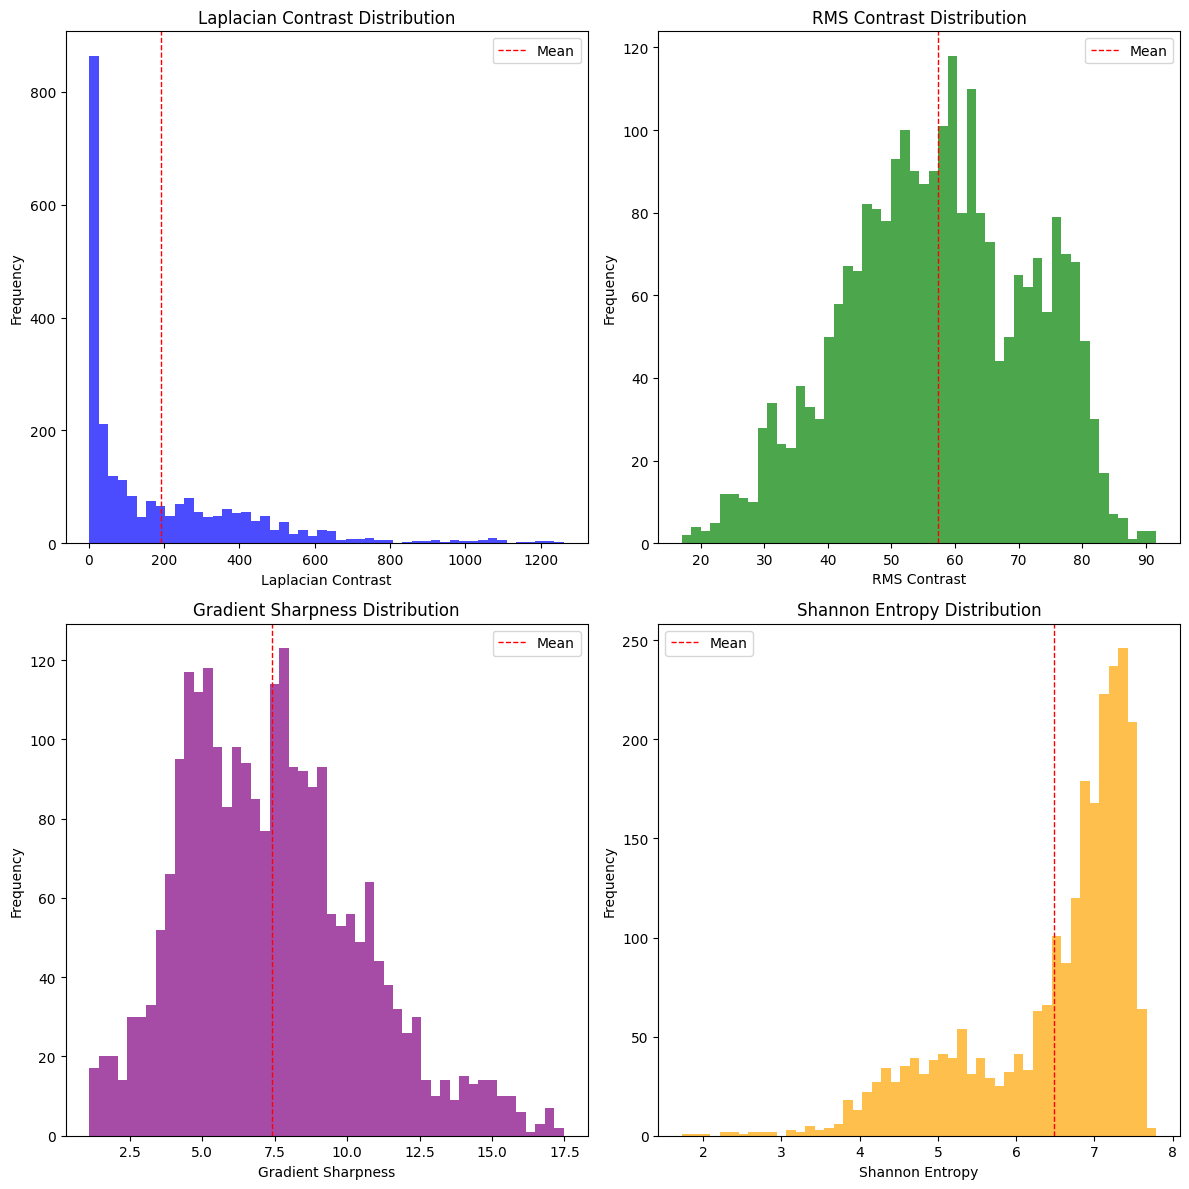

Dataset Summary:
Number of samples: 8827
Image size: 224
Labels: {'0': 'bladder', '1': 'femur-left', '2': 'femur-right', '3': 'heart', '4': 'kidney-left', '5': 'kidney-right', '6': 'liver', '7': 'lung-left', '8': 'lung-right', '9': 'pancreas', '10': 'spleen'}


<Figure size 800x600 with 0 Axes>

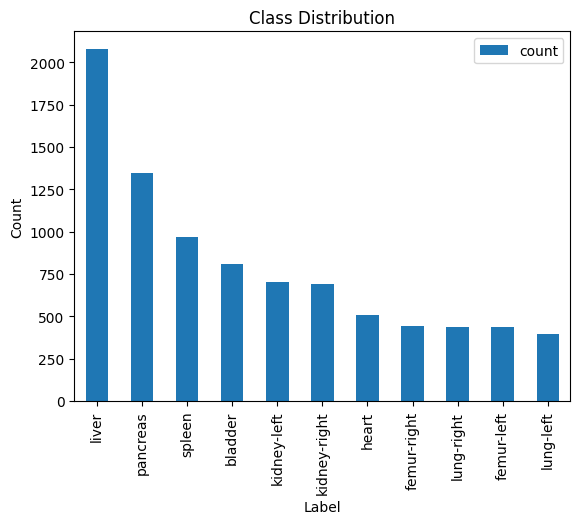

Laplacian Contrast Mean: 116.01792180540707
RMS Contrast Mean: 53.95697090024488
Gradient Sharpness Mean: 6.31139291030684
Shannon Entropy Mean: 6.616405117717391


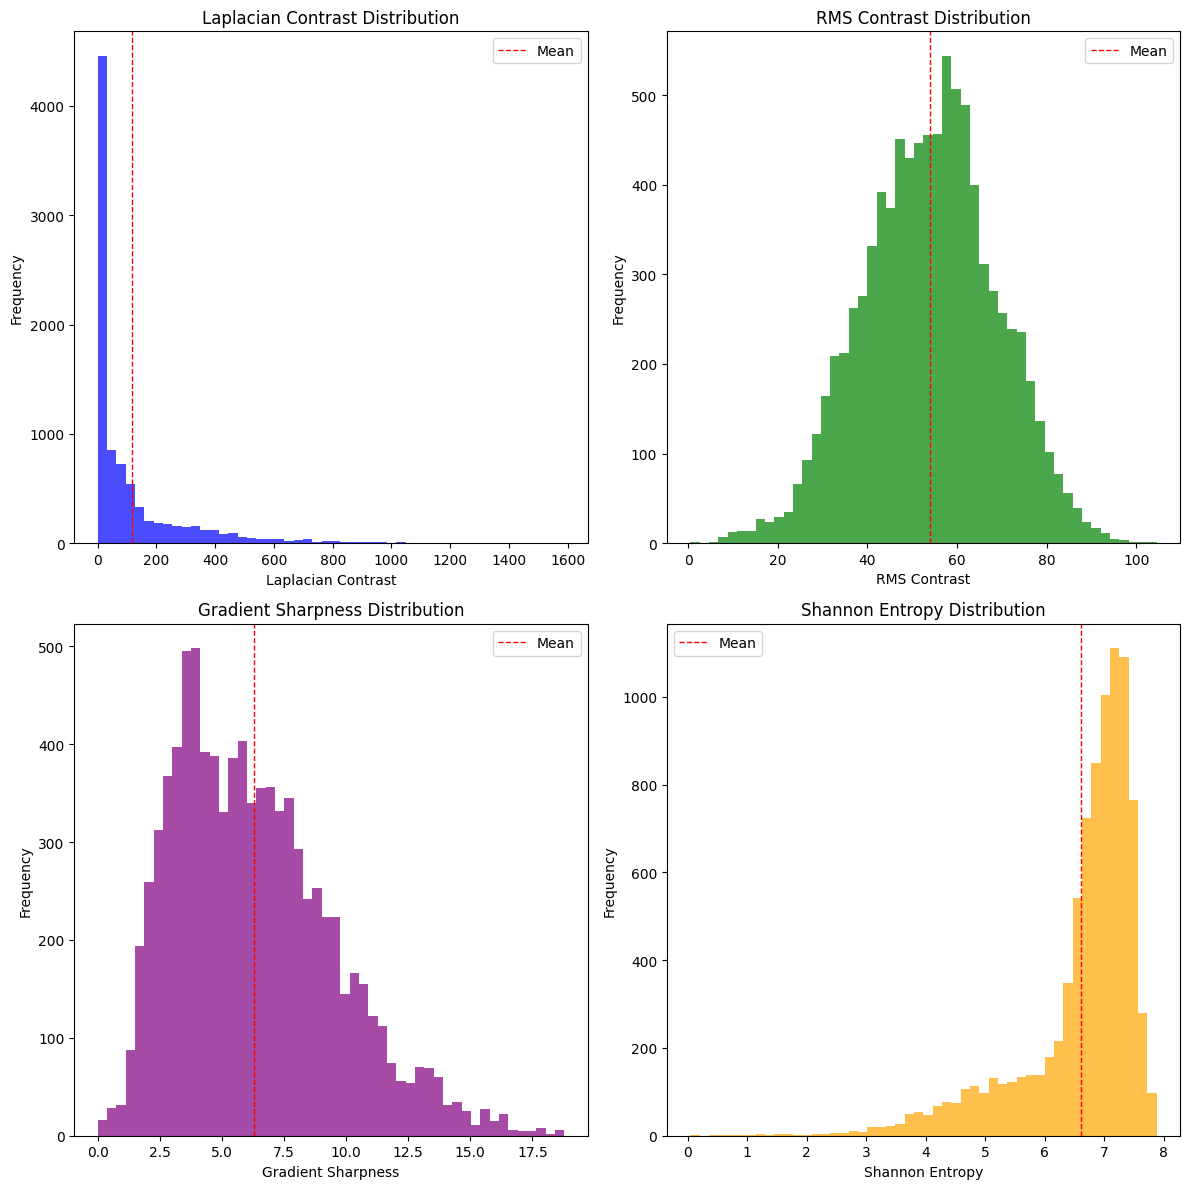

In [6]:
organ_smnist_train = OrganSMNIST(split='train', size=224, download=True)
organ_smnist_val = OrganSMNIST(split='val', size=224, download=True)
organ_smnist_test = OrganSMNIST(split='test', size=224, download=True)

analysis_summary(organ_smnist_train)
analysis_summary(organ_smnist_val)
analysis_summary(organ_smnist_test)
